#### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("height-weight.csv")

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.shape

(23, 2)

In [5]:
df.corr(method='pearson')

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


Text(0, 0.5, 'Height')

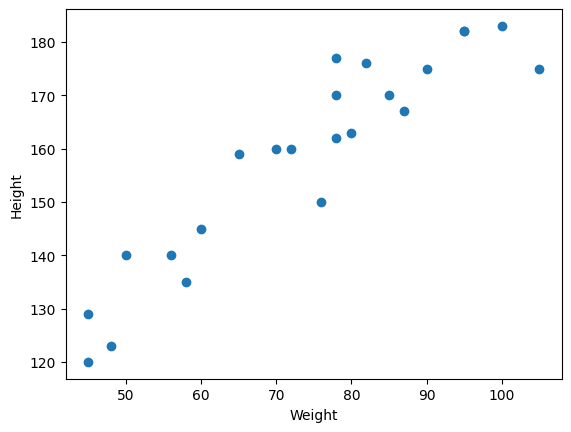

In [6]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel("Height")


In [7]:
X=df[['Weight']] #Independent Features should be a dataframe or a 2 dimensional array, x=df['Weight'] np.array(x)
Y=df['Height'] #Dependant Feaures should be in series or 1d array, np.array(y)

In [11]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [12]:
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [15]:
# Train-Test Split

from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [18]:
X_train.shape

(17, 1)

In [19]:
Y_train.shape

(17,)

In [22]:
print(X_train.mean())
print(X_train.std())

Weight    72.470588
dtype: float64
Weight    17.015132
dtype: float64


In [24]:
print(Y_train.mean())
print(Y_train.std())

156.47058823529412
18.581299897540887


In [25]:
#Standardization- 
# we use standardization to bring both the features to a single unit since weight maybe in kg and height may be in cm 
# so their values might differ kg might have a higher value this will affect the gradient descent approach and take more time to 
# reach the global minima(convergence)

#We will find the Z-score of each feature to standardize each feature

from sklearn.preprocessing import StandardScaler

Why do we apply fit_tranform to training data and only transform to test data?

-> fit method learns the parameters needed for the transformation(encoding/scaling) from training data & transform method 
applies the learned transformation to new data. Here fit_transform is learning transformation parameter(as per trasnformer used) 
from trainset and then applying the transformation to train set in single statement(instead of applying .fit() first and then .
transform()). Next line is transform(testset) which will apply the learned parameters to transform the test data. This keeps 
the test environment pure and AVOID ANY LEAKAGE FROM TEST SIDE TO TRAIN SIDE through this step when you will later do model training.

We do not use fit_transform() for validation data and test data because of two problems:

Data Leakage,
Overfitting
We can explain those two with a simple example-

It is like a leakage of the question paper. If we see the question paper, then there is no point in having exams. Likely If we fit test data, then the entire data is known by the model.

i.e. "Data Leakage", which may lead to "Overfitting", which means we can do well in case of a leaked question paper, but what happens if the principal changes the question paper? Then we fail the test.

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)